# Single Linear Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stats_plots import ols_reg, ols_check
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Regression",
        usecols = ["Ex Caliper Mold Diameter", "Ex Deslagger abrasion setting"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# --- Map to short variable names ---
df = df.rename(columns={
    "Ex Caliper Mold Diameter": "Y",  # response
    "Ex Deslagger abrasion setting": "X"  # predictor
})

df.head()

,Y,X
0,19.500000,57.0
1,20.900000,61.0
2,21.200000,62.0
3,21.364383,62.1
4,22.224956,65.0


## Linear Fitting

In [3]:
# 1️⃣ Fit model
results = ols_reg(df, x_cols = "X", y_col = "Y")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4875.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.08e-29
Time:                        10:21:07   Log-Likelihood:                 24.316
No. Observations:                  26   AIC:                            -44.63
Df Residuals:                      24   BIC:                            -42.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0727      0.333     -0.219      0.8

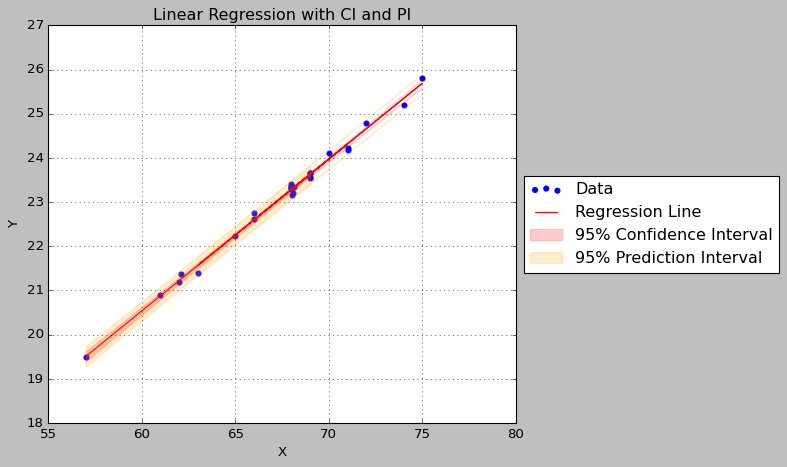

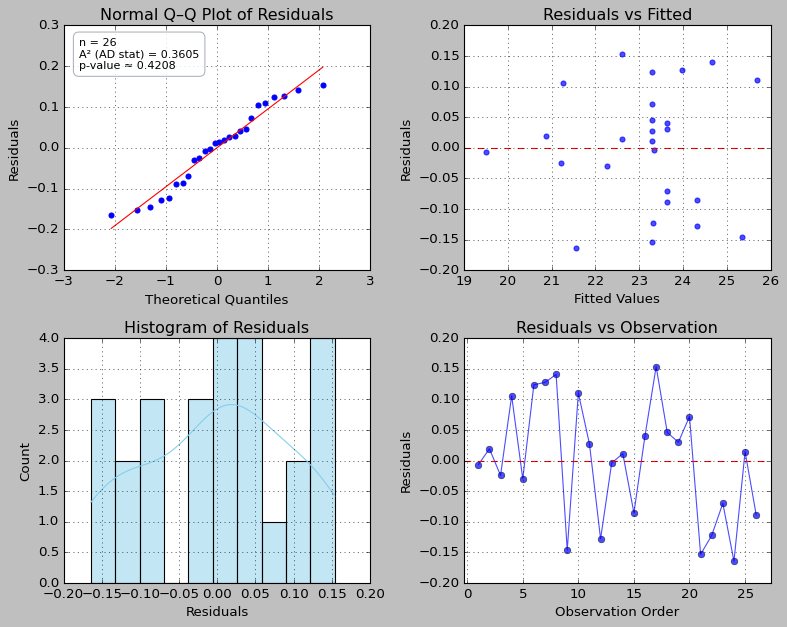

In [4]:
# 2️⃣ Generate diagnostics (with optional CI/PI plot)
ols_check(results["model"], results["df_out"], x_col="X", y_col="Y")

## Analysis output
 - Note the regression equation should only be used in the data range.
 - Again, note the R-sq value.
 - If the P-value is less than alpha = 0.05; conclude that there is a statistically significant association between the response variable and the predictor.

## Checking the assumptions
 - Assumptions must be met to consider the regression valid as follows:
 - Normal probability plot: Residuals must be normally distributed. P-value >0.05, so this example meets the residual normality assumption.1 note: It is not required that the source data be normally distributed, but normality is a 
requirement for the residuals.
 - Versus fits: The predicted (fits) values must show a random pattern versus residuals. This assumption is met for this example.
 - Versus order: The residuals should show a random pattern in the order of observation. This assumption is met for this example.


## Summary
- Visually there appears to be a relationship
- R-Sq (the Correlation Coefficient squared) indicates the percent of variation in the Y (Mold diameter) predicted by the abrasion setting
- In this case, 99.5% - very high and suggests a relationship